# Question 2
## Water Portion

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from src.functions import imshow, imread

In [3]:
# Read the image
image = imread('images/FARMS.png')
original_image = image.copy()

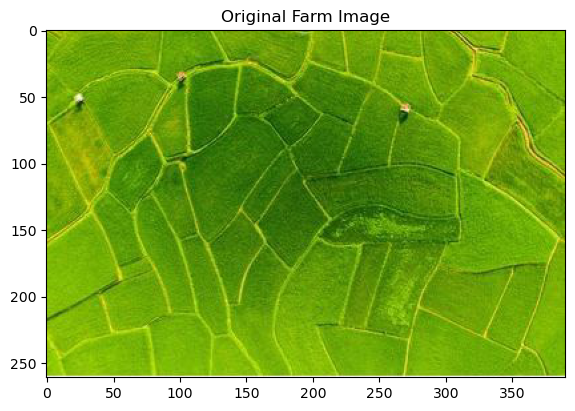

In [4]:
imshow(image, "Original Farm Image")

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [6]:
# Apply Gaussian Blur
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [7]:
# Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150)

In [8]:
# Dilate the edges to close gaps
kernel = np.ones((3,3), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=2)

# Erode the edges to refine them
eroded_edges = cv2.erode(dilated_edges, kernel, iterations=1)

In [9]:
# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(eroded_edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [10]:
# Find contours
contours, _ = cv2.findContours(otsu_thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
# Calculate areas and store them with contours
areas = [(cv2.contourArea(contour), contour) for contour in contours]

# Sort areas in descending order
areas.sort(reverse=True, key=lambda x: x[0])

In [12]:
# Number the lands based on the areas
land_number = 1
numbered_lands = np.zeros_like(gray)

for area, contour in areas:
    if area == 0:
        continue
    cv2.drawContours(numbered_lands, [contour], -1, (land_number), -1)
    land_number += 1


In [13]:
# Create the output image with numbered lands
output_image = original_image.copy()
for i, (area, contour) in enumerate(areas):
    if area == 0:
        continue
    M = cv2.moments(contour)
    if M['m00'] != 0:
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])
        cv2.putText(output_image, str(i+1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, .3, (255, 0, 0), 2)

In [17]:
output_image = cv2.cvtColor(output_image, cv2.COLOR_RGB2BGR)

In [18]:
# Save and display the result
cv2.imwrite('Numbered_FARMS.png', output_image)

True

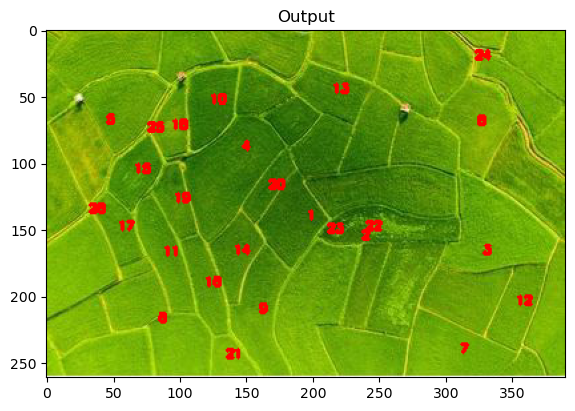

In [15]:
imshow(output_image,'output')

In [ ]:
# TODO: Fix the numbering of the lands